In [50]:
import numpy as np
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

In [59]:
N = 1e4
m = 20
# degrees = [val for (node, val) in ba_network.degree()]

# 1a) Random attack:

In [67]:
ba_network = nx.barabasi_albert_graph(N, m, seed=np.random)

attack_size = N / 100
s_max_list = []
f_list = [(i + 1) / N for i in range(int(attack_size))]
for i in range(int(attack_size)):
    node_to_remove = np.random.choice(ba_network.nodes())
    ba_network.remove_node(node_to_remove)
    C = nx.connected_components(ba_network)
    largest_C = max(C, key=len)
    s_max_list.append(len(largest_C))
    # f_list.append((i + 1) / N)


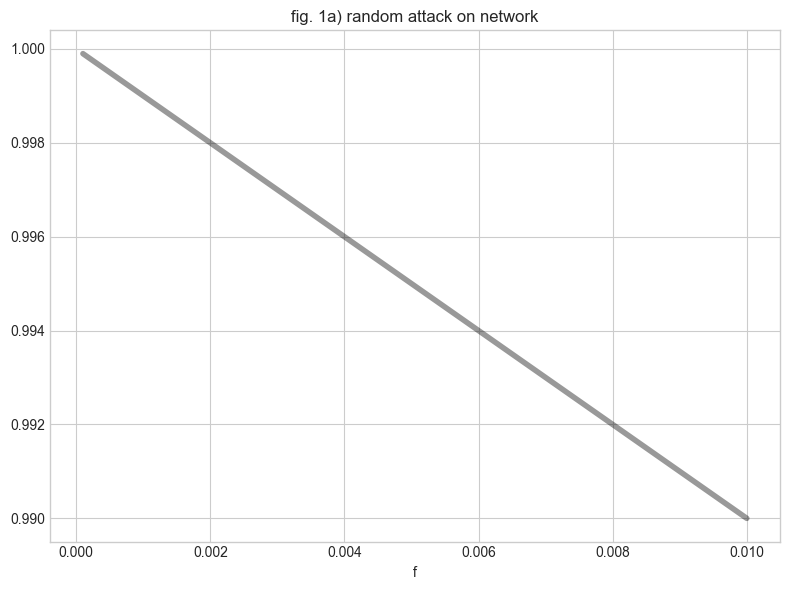

In [68]:
plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
normalized_s_max_list = np.array(s_max_list) / N
plt.plot(f_list, normalized_s_max_list, color = 'k', lw = 4, alpha = 0.4)
plt.title("fig. 1a) random attack on network")
# plt.ylabel("$\frac{s_max}{N}$")
plt.xlabel(f"f")
plt.minorticks_on()
plt.tight_layout()
plt.show()

# 1b) Degree-targeted attack:

In [ ]:
ba_network = nx.barabasi_albert_graph(N, m, seed=np.random)

attack_size = 8000
s_max_list = []
f_list = [(i + 1) / N for i in range(int(attack_size))]
for i in range(int(attack_size)):
    node_to_remove, _ = max(ba_network.degree, key=lambda x: x[1])
    ba_network.remove_node(node_to_remove)
    C = nx.connected_components(ba_network)
    largest_C = max(C, key=len)
    s_max_list.append(len(largest_C))
    # f_list.append((i + 1) / N)

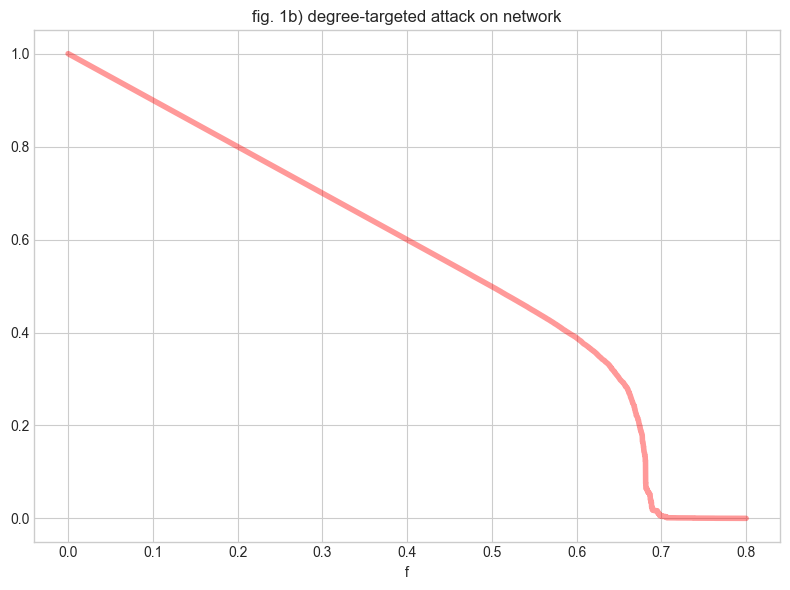

In [73]:
plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
normalized_s_max_list = np.array(s_max_list) / N
plt.plot(f_list, normalized_s_max_list, color = 'r', lw = 4, alpha = 0.4)
plt.title("fig. 1b) degree-targeted attack on network")
# plt.ylabel("$\frac{s_max}{N}$")
plt.xlabel(f"f")
plt.minorticks_on()
plt.tight_layout()
plt.show()

# 1c) Clustering-targeted attack:

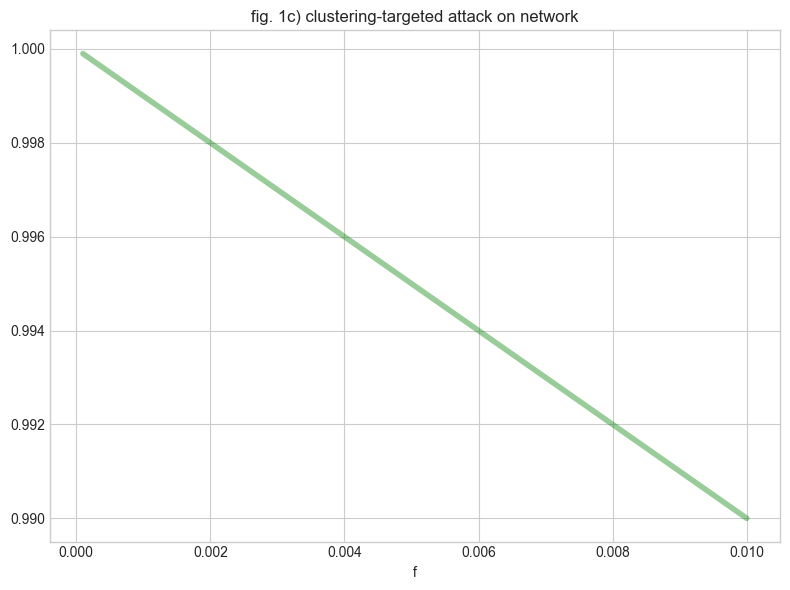

In [76]:
ba_network = nx.barabasi_albert_graph(N, m, seed=np.random)

attack_size = 100
s_max_list = []
f_list = [(i + 1) / N for i in range(int(attack_size))]
for i in range(int(attack_size)):
    clustering_coefficients = nx.clustering(ba_network)
    node_to_remove = max(clustering_coefficients, key=clustering_coefficients.get)

    ba_network.remove_node(node_to_remove)
    C = nx.connected_components(ba_network)
    largest_C = max(C, key=len)
    s_max_list.append(len(largest_C))
    # f_list.append((i + 1) / N)

plt.figure(figsize = (8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
normalized_s_max_list = np.array(s_max_list) / N
plt.plot(f_list, normalized_s_max_list, color = 'g', lw = 4, alpha = 0.4)
plt.title("fig. 1c) clustering-targeted attack on network")
# plt.ylabel("$\frac{s_max}{N}$")
plt.xlabel(f"f")
plt.minorticks_on()
plt.tight_layout()
plt.show()

# 1d) Early-first attack:

In [ ]:
ba_network = nx.barabasi_albert_graph(N, m, seed=np.random)

attack_size = 8000
s_max_list = []
f_list = [(i + 1) / N for i in range(int(attack_size))]
node_to_remove_list = 
for i in range(int(attack_size)):
    node_to_remove, _ = max(ba_network.degree, key=lambda x: x[1])
    ba_network.remove_node(node_to_remove)
    C = nx.connected_components(ba_network)
    largest_C = max(C, key=len)
    s_max_list.append(len(largest_C))
    # f_list.append((i + 1) / N)

Interpreation of my results: